In [ ]:
#pip install matplotlib wordcloud networkx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import networkx as nx

In [2]:
df=pd.read_csv("../Assigmnent 10-Recommendation System/book.csv",encoding='latin1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
#renaming columns
df=df.rename(columns={'Unnamed: 0':'Index','User.ID':'UserID','Book.Title':'BookTitle','Book.Rating':'Rating'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Index      10000 non-null  int64 
 1   UserID     10000 non-null  int64 
 2   BookTitle  10000 non-null  object
 3   Rating     10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
df.drop('Index',axis=1,inplace=True)

In [6]:
len(df['UserID'].unique())

2182

In [7]:
# print(len(movies_df['movie'].unique()))
df['BookTitle'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: BookTitle, Length: 9659, dtype: int64

In [8]:
df['Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

In [9]:
print(df.sort_values('UserID'))

      UserID                                          BookTitle  Rating
2401       8                                              Wings       5
2400       8  The Western way: A practical guide to the West...       5
2399       8                            Ancient Celtic Romances       5
2402       8                                           Truckers       5
2405       8                                  The Art Of Celtia       7
...      ...                                                ...     ...
2395  278854      La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica)       7
2398  278854  Celtic Mythology (Library of the World's Myths...       8
2393  278854                         A corrente de Trewis Scott       7
2394  278854                                      As valkÃ­rias       7
2397  278854     A Treasury of Irish Myth, Legend, and Folklore       6

[10000 rows x 3 columns]


In [10]:
len(df.BookTitle.unique())

9659

In [11]:
df

,UserID,BookTitle,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [12]:
user_df = df.groupby(['UserID', 'BookTitle'])['Rating'].mean().unstack()

In [19]:
# Creating the user-item matrix
user_item_matrix = df.pivot_table(index='UserID', columns='BookTitle', values='Rating').fillna(0)
user_item_matrix

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [20]:
# Computing cosine similarity between users
cosine_sim = cosine_similarity(user_item_matrix)

In [21]:
# Convert cosine similarity matrix to DataFrame for better handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

In [23]:
# Function to get similar users for a given user
def get_similar_users(user_id, similarity_matrix=user_sim_matrix, user_ids=user_item_matrix.index):
    user_index = user_ids.get_loc(user_id)
    similar_users = similarity_matrix[user_index]
    similar_user_indices = similar_users.argsort()[::-1][1:]  # Exclude the user itself
    similar_user_ids = user_ids[similar_user_indices]
    return similar_user_ids

In [24]:
# Function to recommend books to a user based on similar users' preferences
def recommend_books(user_id, num_recommendations=5):
    similar_users = get_similar_users(user_id)
    recommended_books = []
    for similar_user_id in similar_users:
        similar_user_ratings = user_item_matrix.loc[similar_user_id]
        unrated_books = similar_user_ratings[similar_user_ratings == 0].index
        recommended_books.extend(unrated_books)
        if len(recommended_books) >= num_recommendations:
            break
    return recommended_books[:num_recommendations]

In [25]:
# Function to get recommendations for a user
def get_recommendations(user_id, top_n=5):
    # Get the top similar users to the user_id, excluding the user itself
    similar_users = cosine_sim_df[user_id].sort_values(ascending=False).iloc[1:top_n+1].index
    
    # Aggregating books rated by similar users
    books_to_recommend = user_item_matrix.loc[similar_users].sum().sort_values(ascending=False)
    
    # Filtering out books the user has already rated
    rated_books = user_item_matrix.loc[user_id]
    books_to_recommend = books_to_recommend[rated_books[rated_books == 0].index]
    
    return books_to_recommend.head(top_n)

In [28]:
# Example: Get top 5 recommendations for user 276726
print(get_recommendations(278846, 5))

BookTitle
 Jason, Madison &amp                                                     0.0
 Other Stories;Merril;1985;McClelland &amp                               0.0
 Repairing PC Drives &amp                                                0.0
'48                                                                      0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities    0.0
dtype: float64


In [30]:
# Example usage
user_id = 278846  # Example user ID
recommended_books = recommend_books(user_id)
print(f"Recommended books for user {user_id}:")
print(recommended_books)

Recommended books for user 278846:
[' Jason, Madison &amp', ' Other Stories;Merril;1985;McClelland &amp', ' Repairing PC Drives &amp', "'48", "'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities"]


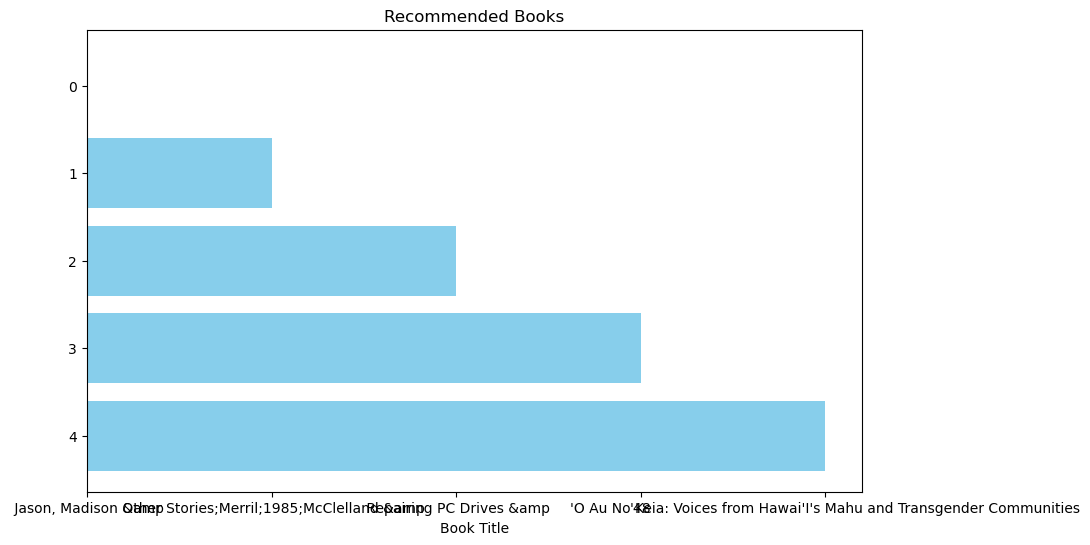

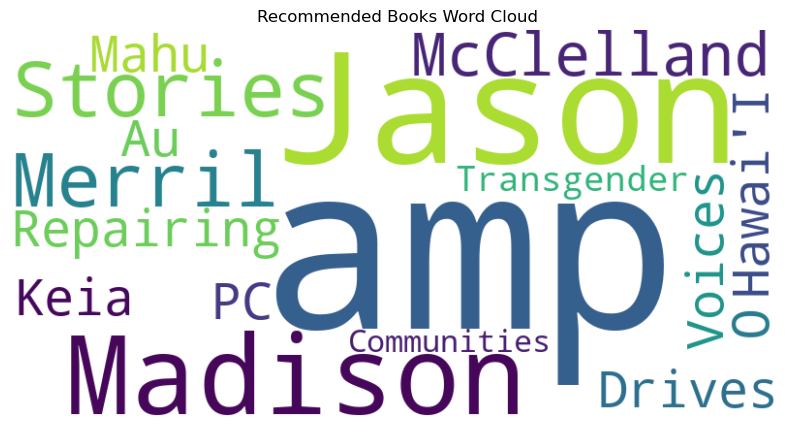

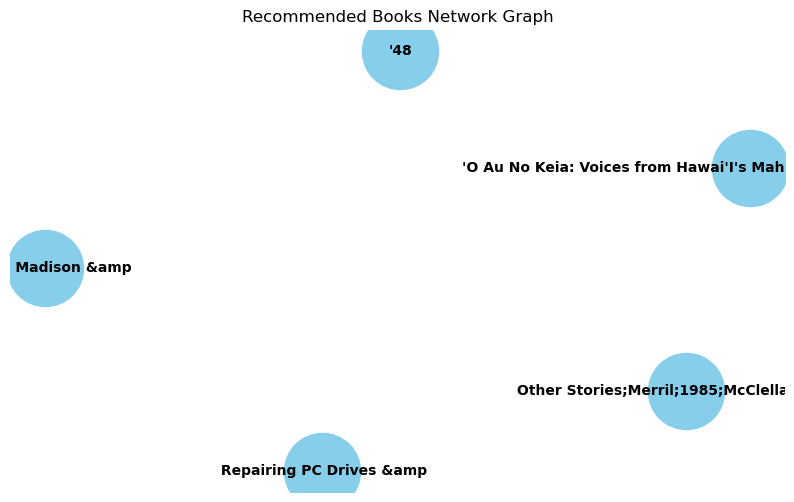

In [31]:
# Visualize the recommendation results
def visualize_recommendations(recommended_books):
    # Bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(recommended_books)), recommended_books, color='skyblue')
    plt.xlabel('Book Title')
    plt.title('Recommended Books')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

    # Word cloud
    text = ' '.join(recommended_books)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Recommended Books Word Cloud')
    plt.show()

    # Network graph
    graph = nx.Graph()  # Renaming 'G' to 'graph'
    graph.add_nodes_from(recommended_books)
    
    # Explicitly create a new figure and axis for the network graph
    fig, ax = plt.subplots(figsize=(10, 6))
    pos = nx.spring_layout(graph)  # Using 'graph' instead of 'G'
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold')  # Using 'graph' instead of 'G'
    ax.set_title('Recommended Books Network Graph')
    plt.show()

# Visualize recommendations
visualize_recommendations(recommended_books)


In [46]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
user_sim = 1-pairwise_distances(user_item_matrix.values,metric='cosine')

In [47]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [48]:
user_sim.shape

(2182, 2182)

In [49]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
user_sim_df.index=df.UserID.unique()
user_sim_df.columns=df.UserID.unique()

In [51]:
user_sim_df.iloc[0:15, 0:15]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
import numpy as np
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:15, 0:15]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#Most Similar Users
print(user_sim_df.idxmax(axis=1))
len(user_sim_df.idxmax(axis=1))

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64


2182

In [55]:
#Most Similar Users
len(user_sim_df.idxmax(axis=1).unique())

260

In [56]:
user_sim_df.loc[276772,1491]

0.04354129784609928

In [57]:
user_sim_df.loc[276748,161677]

0.08704569738537926

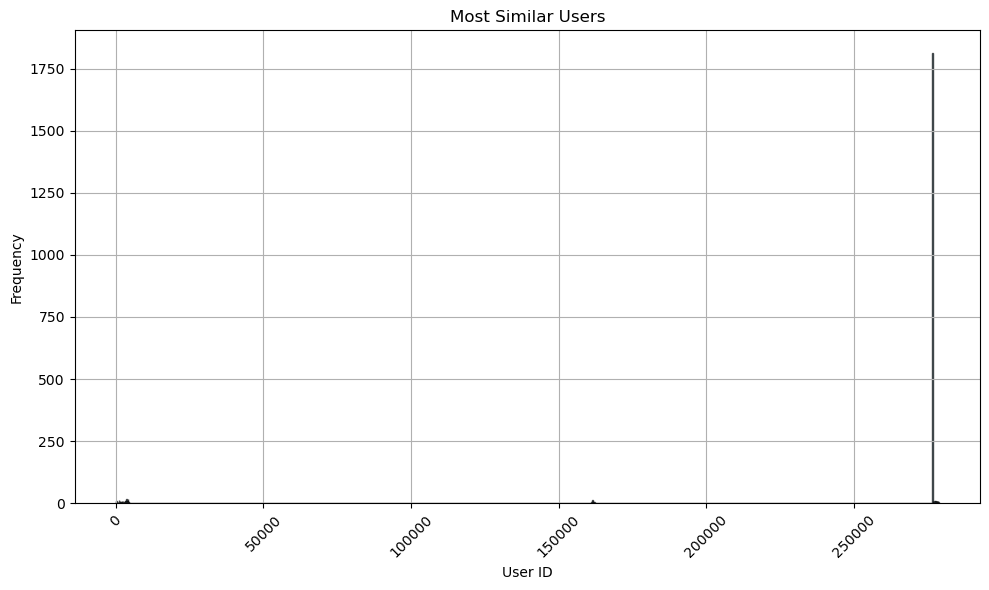

In [58]:
import matplotlib.pyplot as plt
# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(user_sim_df.idxmax(axis=1), bins=len(user_sim_df), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Most Similar Users')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
# Normalize ratings using MinMaxScaler
scaler = MinMaxScaler()
normalized_ratings = scaler.fit_transform(user_item_matrix)

In [60]:
# Normalize ratings using MinMaxScaler
scaler = MinMaxScaler()
normalized_ratings = scaler.fit_transform(user_item_matrix)

In [61]:
# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(normalized_ratings, normalized_ratings)

In [62]:
# Convert cosine similarity matrix to DataFrame for visualization
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

In [63]:
def recommend_books(book_title, cosine_sim_df, n=5):
    # Get the cosine similarity scores for the given book
    similar_books = cosine_sim_df[book_title]
    
    # Sort the similar books by their similarity scores
    similar_books = similar_books.sort_values(ascending=False)
    
    # Exclude the given book itself from the recommendations
    similar_books = similar_books.drop(book_title)
    
    # Get the top n most similar books
    top_n_books = similar_books.head(n)
    
    return top_n_books

In [64]:
df

,UserID,BookTitle,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


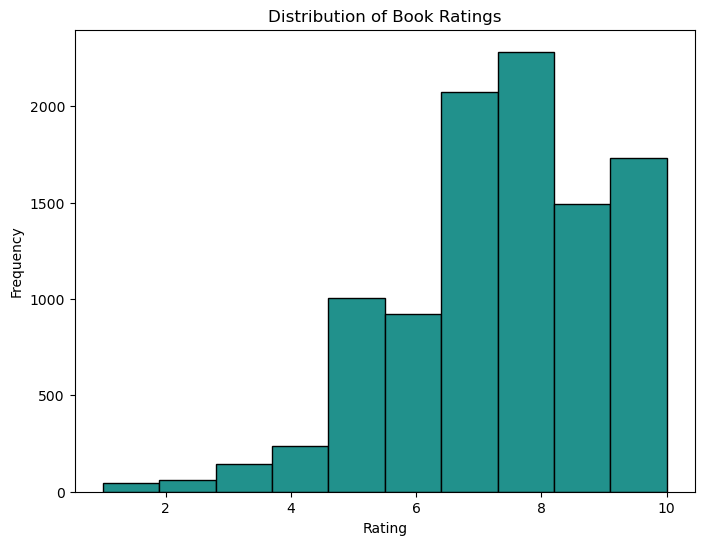

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of book ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=10, color=plt.cm.viridis(0.5), edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


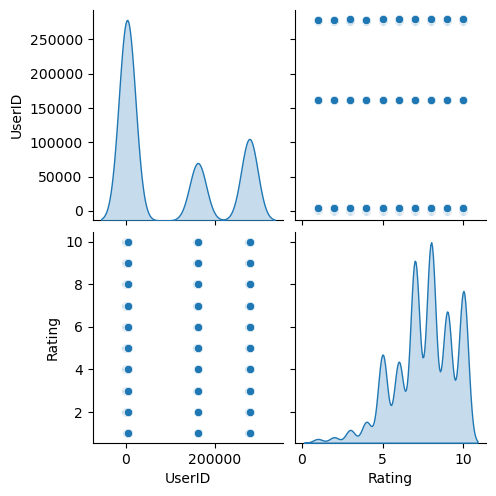

In [66]:
import warnings
# Ignore specific warning
warnings.filterwarnings("ignore")
# Pairplot of book ratings with other features (if available)
sns.pairplot(df, diag_kind='kde', palette='husl')
plt.show()


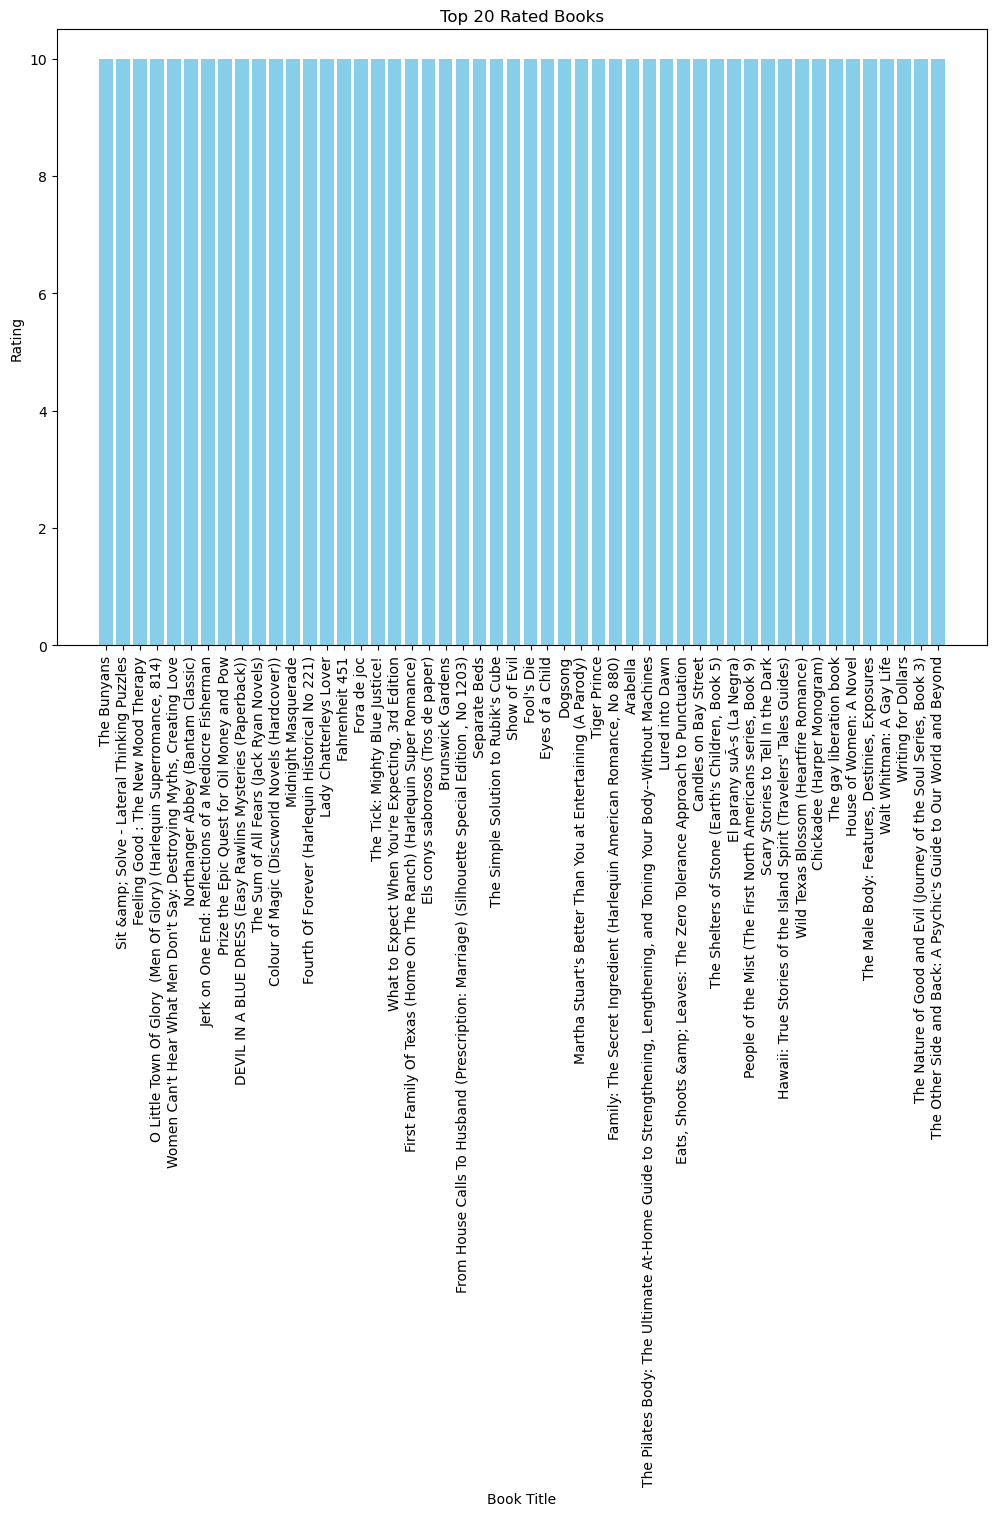

In [67]:
# Sort the DataFrame by 'Rating' column
sorted_df = df.sort_values(by='Rating', ascending=False)

# Get the top 20 rated books
top_20_books = sorted_df.head(50)

# Extract book titles and ratings
book_titles = top_20_books['BookTitle']
ratings = top_20_books['Rating']

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(book_titles, ratings, color='skyblue')
plt.xlabel('Book Title')
plt.ylabel('Rating')
plt.title('Top 20 Rated Books')
plt.xticks(rotation=90)
plt.show()

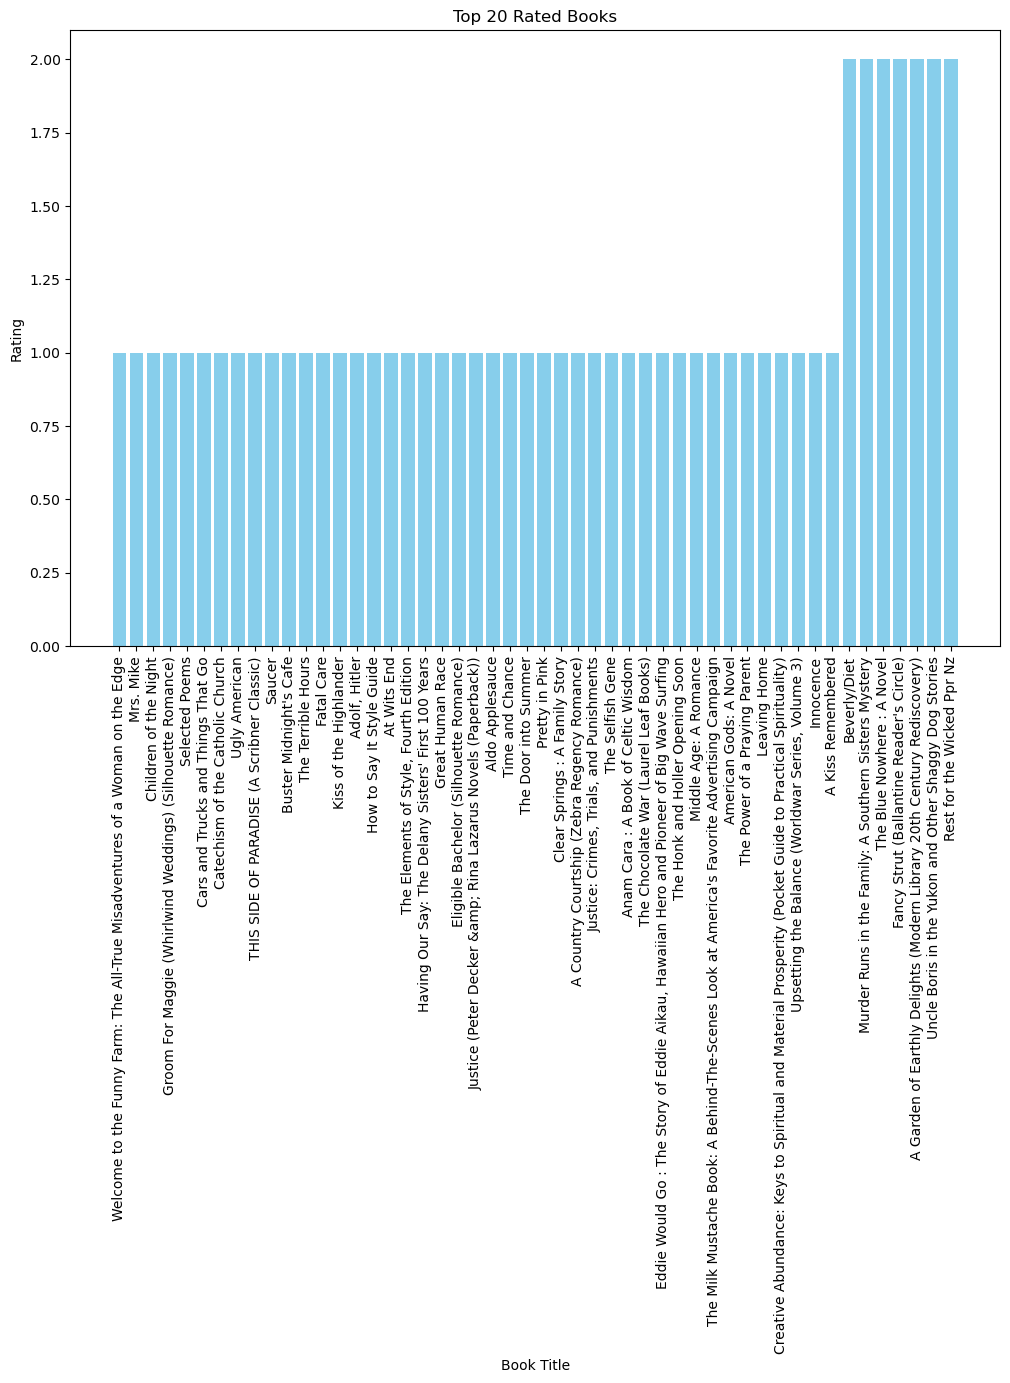

In [68]:
# Sort the DataFrame by 'Book.Rating' column
sorted_df = df.sort_values(by='Rating', ascending=True)

# Get the top 20 rated books
top_20_books = sorted_df.head(50)

# Extract book titles and ratings
book_titles = top_20_books['BookTitle']
ratings = top_20_books['Rating']

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(book_titles, ratings, color='skyblue')
plt.xlabel('Book Title')
plt.ylabel('Rating')
plt.title('Top 20 Rated Books')
plt.xticks(rotation=90)
plt.show()

In [70]:
print("User IDs in user-item matrix:", user_item_matrix.index)

User IDs in user-item matrix: Int64Index([276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748,
            276751, 276754,
            ...
            162085, 162091, 162092, 162095, 162103, 162107, 162109, 162113,
            162121, 162129],
           dtype='int64', length=2182)


# Collaborative Filtering:

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Convert DataFrame to ensure User.ID is of string type if not already
df['UserID'] = df['UserID'].astype(str)

# Pivot table to create a user-item matrix
user_item_matrix = df.pivot_table(index='UserID', columns='BookTitle', values='Rating', fill_value=0)

# Compute cosine similarity matrix between users
user_sim_matrix = cosine_similarity(user_item_matrix)

# Create a mapping from User ID to index in the user-item matrix
user_id_to_index = {user_id: index for index, user_id in enumerate(user_item_matrix.index)}

# Example user ID to recommend for
user_id_str = '276726'  # User ID as string, to match DataFrame conversion

# Check if the user ID is in the mapping
if user_id_str in user_id_to_index:
    user_index = user_id_to_index[user_id_str]
    similar_users = user_sim_matrix[user_index]  # Similarity scores for the user

    # Get indices of similar users, sorted by similarity
    similar_user_indices = similar_users.argsort()[::-1][1:]  # Exclude the user itself

    # Recommend books based on similar users' preferences
    recommended_books = []
    for similar_index in similar_user_indices:
        similar_user_id = user_item_matrix.index[similar_index]
        user_ratings = user_item_matrix.loc[similar_user_id]
        recommended_books.extend(user_ratings[user_ratings > 0].index.tolist())

    # Remove already rated books by the target user
    rated_books = set(user_item_matrix.columns[user_item_matrix.loc[user_id_str] > 0])
    recommended_books = list(set(recommended_books) - rated_books)

    print("Collaborative Filtering Recommendations for User ID", user_id_str, ":", recommended_books)
else:
    print(f"User ID {user_id_str} not found in the dataset.")


Collaborative Filtering Recommendations for User ID 276726 : ['The Years with Laura Diaz', 'The Fortunate Pilgrim', 'The Thin Pink Line (Red Dress Ink)', 'The Firebrand: A Novel', 'The Marriage Test', 'God Is No Laughing Matter: Observations and Objections on the Spiritual Path', 'The Jesus Incident', "Pourquoi j'ai mangÃ?Â© mon pÃ?Â¨re", "A Child's Called It and The Lost Boy", 'The Western Mysteries: An Encyclopedic Guide to the Sacred Languages &amp; Magickal Systems of the World : The Key of It All, Book II (Key of It All)', 'You Can Be Happy No Matter What: Five Principles for Keeping Life in Perspective', 'Lord of the Flies', 'Der FÃ?Â¼rst der Finsternis. Roman.', 'On Bear Mountain', 'The Girl in the Window', 'Northwest Wines and Wineries', 'Children of the Night', 'Emerald', 'Hunde von Riga.', 'Nate the Great Stalks Stupidweed', 'Sacajawea', 'The Morning After: Sex, Fear, and Feminism on Campus', 'Miracle Worker', 'A Monk Swimming : A Memoir', 'Chasing Cezanne', 'Woody Allen on W

# Content-Based Filtering:

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Ensure the book titles are unique if they aren't already
# This step is optional and depends on your dataset and goal
# df = df.drop_duplicates(subset='Book.Title', keep='first')

# Create TF-IDF matrix for book titles
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['BookTitle'])

# Calculate cosine similarity between book titles
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get book recommendations based on the title
def get_recommendations(title, cosine_sim=cosine_sim_matrix):
    # Get the index of the book that matches the title
    idx = df.index[df['BookTitle'] == title].tolist()[0]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return df['BookTitle'].iloc[book_indices]

# Using the function to get recommendations
recommended_books = get_recommendations('Classical Mythology')

print("Content-Based Filtering Recommendations for 'Classical Mythology':")
print(recommended_books)


Content-Based Filtering Recommendations for 'Classical Mythology':
3063                      Mythology 101 (Questar Fantasy)
2398    Celtic Mythology (Library of the World's Myths...
1                                            Clara Callan
2                                    Decision in Normandy
3       Flu: The Story of the Great Influenza Pandemic...
4                                  The Mummies of Urumchi
5                                  The Kitchen God's Wife
6       What If?: The World's Foremost Military Histor...
7                                         PLEADING GUILTY
8       Under the Black Flag: The Romance and the Real...
Name: BookTitle, dtype: object


# Popularity-Based Recommendations:

In [76]:
# Get top rated books
top_rated_books = df.sort_values(by='Rating', ascending=False)['BookTitle'].tolist()

print("Popularity-Based Recommendations:", top_rated_books)


Popularity-Based Recommendations: ['The Bunyans', 'Sit &amp; Solve - Lateral Thinking Puzzles', 'Feeling Good : The New Mood Therapy', 'O Little Town Of Glory  (Men Of Glory) (Harlequin Superromance, 814)', "Women Can't Hear What Men Don't Say: Destroying Myths, Creating Love", 'Northanger Abbey (Bantam Classic)', 'Jerk on One End: Reflections of a Mediocre Fisherman', 'Prize the Epic Quest for Oil Money and Pow', 'DEVIL IN A BLUE DRESS (Easy Rawlins Mysteries (Paperback))', 'The Sum of All Fears (Jack Ryan Novels)', 'Colour of Magic (Discworld Novels (Hardcover))', 'Midnight Masquerade', 'Fourth Of Forever (Harlequin Historical No 221)', 'Lady Chatterleys Lover', 'Fahrenheit 451', 'Fora de joc', 'The Tick: Mighty Blue Justice!', "What to Expect When You're Expecting, 3rd Edition", 'First Family Of Texas (Home On The Ranch) (Harlequin Super Romance)', 'Els conys saborosos (Tros de paper)', 'Brunswick Gardens', 'From House Calls To Husband (Prescription: Marriage) (Silhouette Special Ed

In [77]:
# Aggregate data
user_ratings_count = df.groupby('UserID')['Rating'].value_counts().unstack(fill_value=0)
user_ratings_count

Rating,1,2,3,4,5,6,7,8,9,10
UserID,,,,,,,,,,
10,0,0,0,0,0,1,0,0,0,0
1003,0,0,0,0,1,0,0,0,0,0
1008,0,0,0,0,0,0,0,0,1,0
1009,0,0,0,0,0,0,0,1,1,1
1010,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
974,0,0,0,0,0,0,0,0,0,1
984,0,0,0,0,0,0,2,0,1,0
99,0,0,1,0,0,1,1,2,1,2


In [80]:
df['BookTitle']


,UserID,BookTitle,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


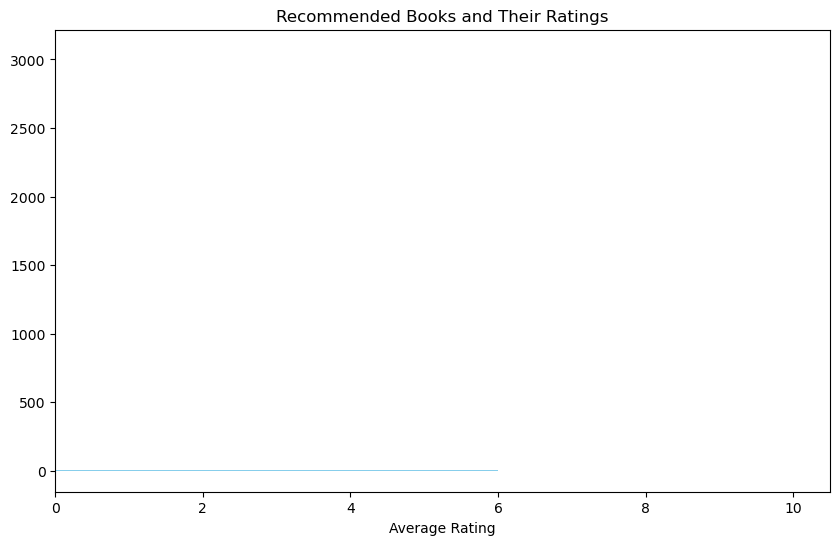

In [81]:
book=df['BookTitle']
book_ratings =df['Rating']

# Filter out ratings for the recommended books
filtered_ratings = {book: rating for book, rating in book_ratings.items() if book in recommended_books}

# Plotting
plt.figure(figsize=(10, 6))
books = list(filtered_ratings.keys())
ratings = list(filtered_ratings.values())
plt.barh(books, ratings, color='skyblue')
plt.xlabel('Average Rating')
plt.title('Recommended Books and Their Ratings')
plt.show()